Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

Import the dataset

In [2]:
df=pd.read_csv('heart.csv')
df.head()

age sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   52   M   0       125   212    0  ...      0      1.0      2   2     3       0
1   53   F   0       140   203    1  ...      1      3.1      0   0     3       0
2   70   M   0       145   174    0  ...      1      2.6      0   0     3       0
3   61   1   0       148   203    0  ...      0      0.0      2   1     3       0
4   62   0   0       138   294    1  ...      0      1.9      1   3     2       0

[5 rows x 14 columns]

Understanding and displaying the data

Label encoding is performed on the feature 'SEX'

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df = df[df['sex'] != 0]
df = df.reset_index(drop=True)

In [4]:
print('The information about the dataset is : \n',df.info(),'\n')
print('The uniqueness of the dataset is : \n',df.nunique(),'\n')
print('Checking if the datatype is numeric or object type, true when object : \n',df.dtypes=='object','\n')
print('Checking for the missing values : \n',df.isnull().sum(),'\n')
print('The basic statistics of the data, that is data description : \n',df.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       713 non-null    int64  
 1   sex       713 non-null    int32  
 2   cp        713 non-null    int64  
 3   trestbps  713 non-null    int64  
 4   chol      713 non-null    int64  
 5   fbs       713 non-null    int64  
 6   restecg   713 non-null    int64  
 7   thalach   713 non-null    int64  
 8   exang     713 non-null    int64  
 9   oldpeak   713 non-null    float64
 10  slope     713 non-null    int64  
 11  ca        713 non-null    int64  
 12  thal      713 non-null    int64  
 13  target    713 non-null    int64  
dtypes: float64(1), int32(1), int64(12)
memory usage: 75.3 KB
The information about the dataset is : 
 None 

The uniqueness of the dataset is : 
 age          38
sex           3
cp            4
trestbps     44
chol        119
fbs           2
restecg       3
thalach     

Exploratory Data Analysis
Includes univariate, bivariate and multivariate analysis as part of data preprocessing

Univariate Analysis 
Univariate analysis is being done using box plot to detect the outliers

<Axes: >

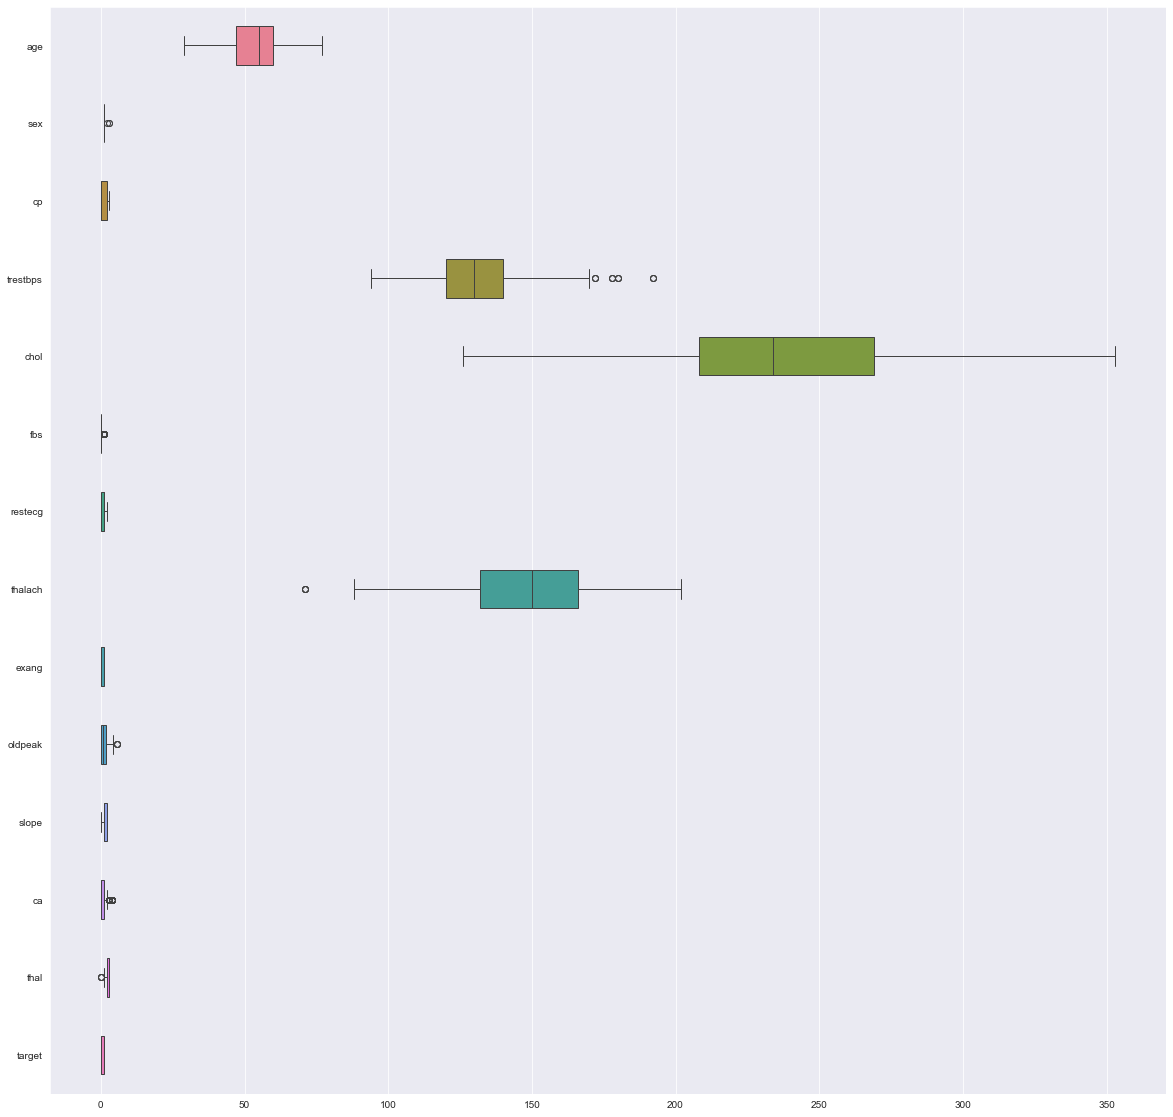

In [5]:
plt.figure(figsize=(20,20))
sns.set_style('darkgrid')
sns.set_palette('pastel')
sns.boxplot(data=df,orient='h',width=0.5)

Count plot to check the class balance in the target feature

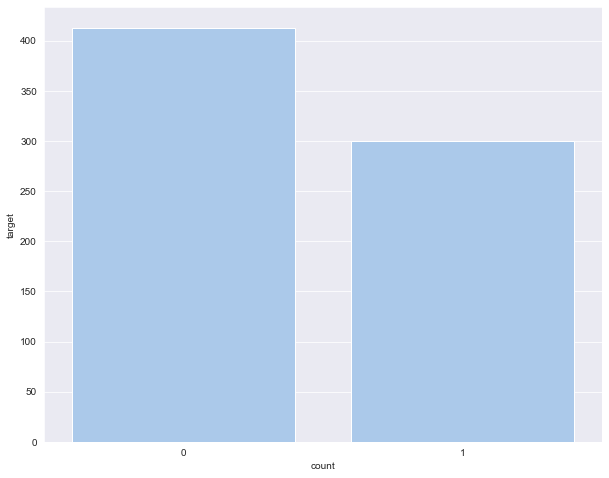

In [6]:
plt.figure(figsize=(10,8))
sns.countplot(x='target',data=df)
plt.xlabel('count')
plt.ylabel('target')
plt.show()

Kernel Density plots for skewness and the data distribution

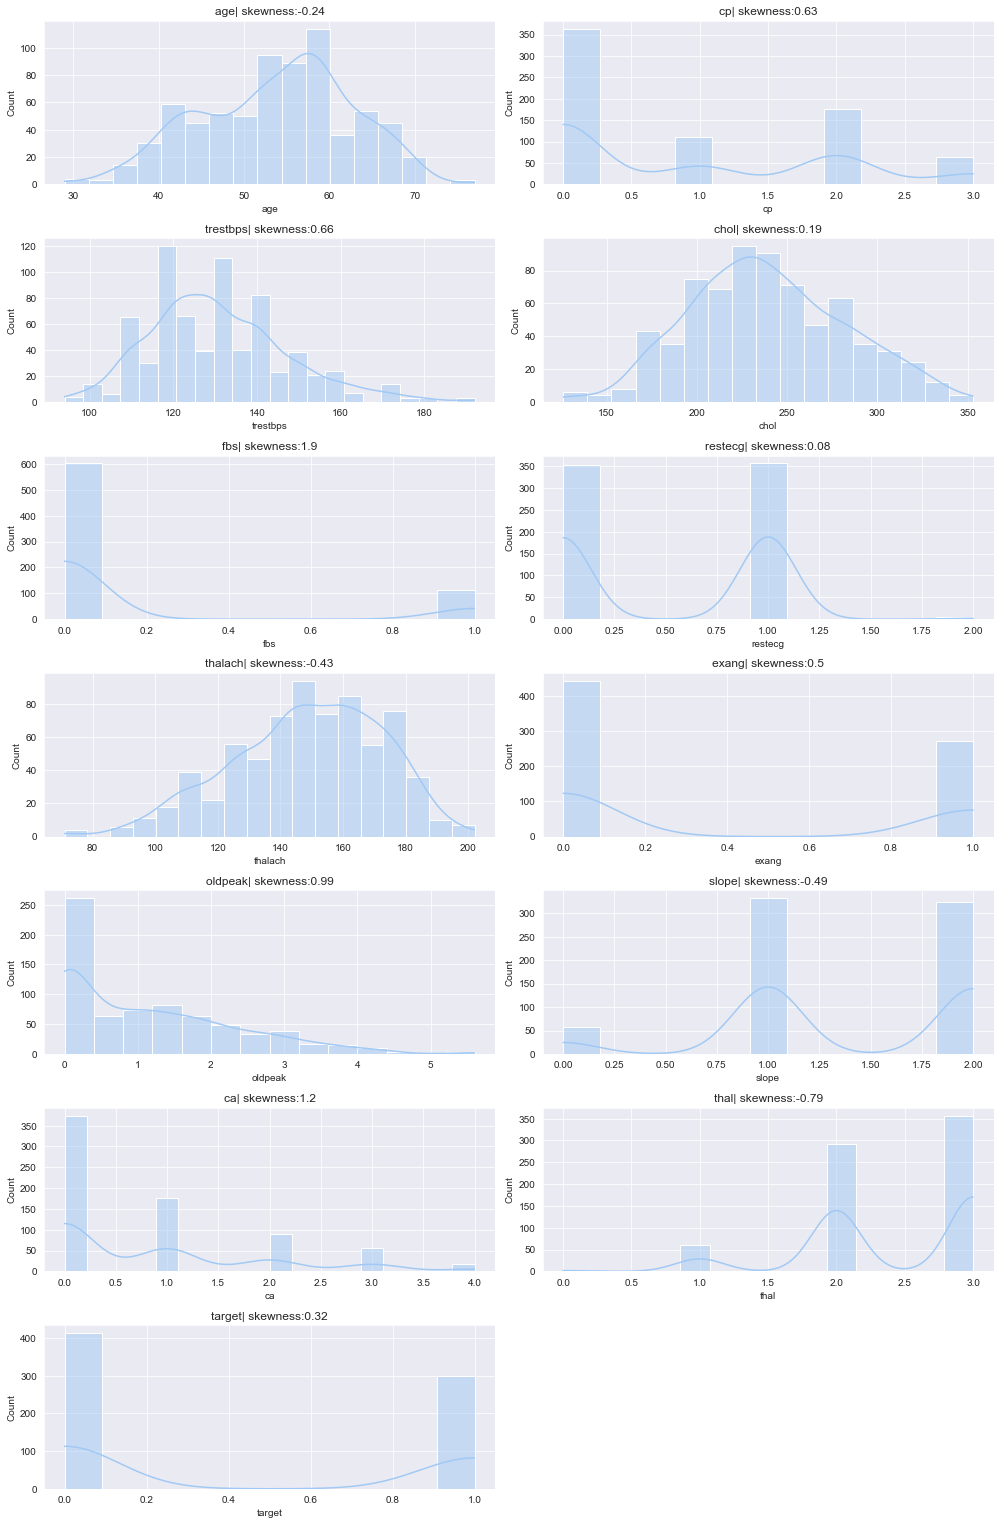

In [7]:
sns.set_style('darkgrid')
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(14,len(numerical_columns)*3))
for idx, feature in enumerate(numerical_columns,1):
    plt.subplot(len(numerical_columns),2,idx)
    sns.histplot(df[feature],kde=True)
    plt.title(f"{feature}| skewness:{round(df[feature].skew(),2)}")

plt.tight_layout()
plt.show()

Bivariate analysis is being performed using pairplots

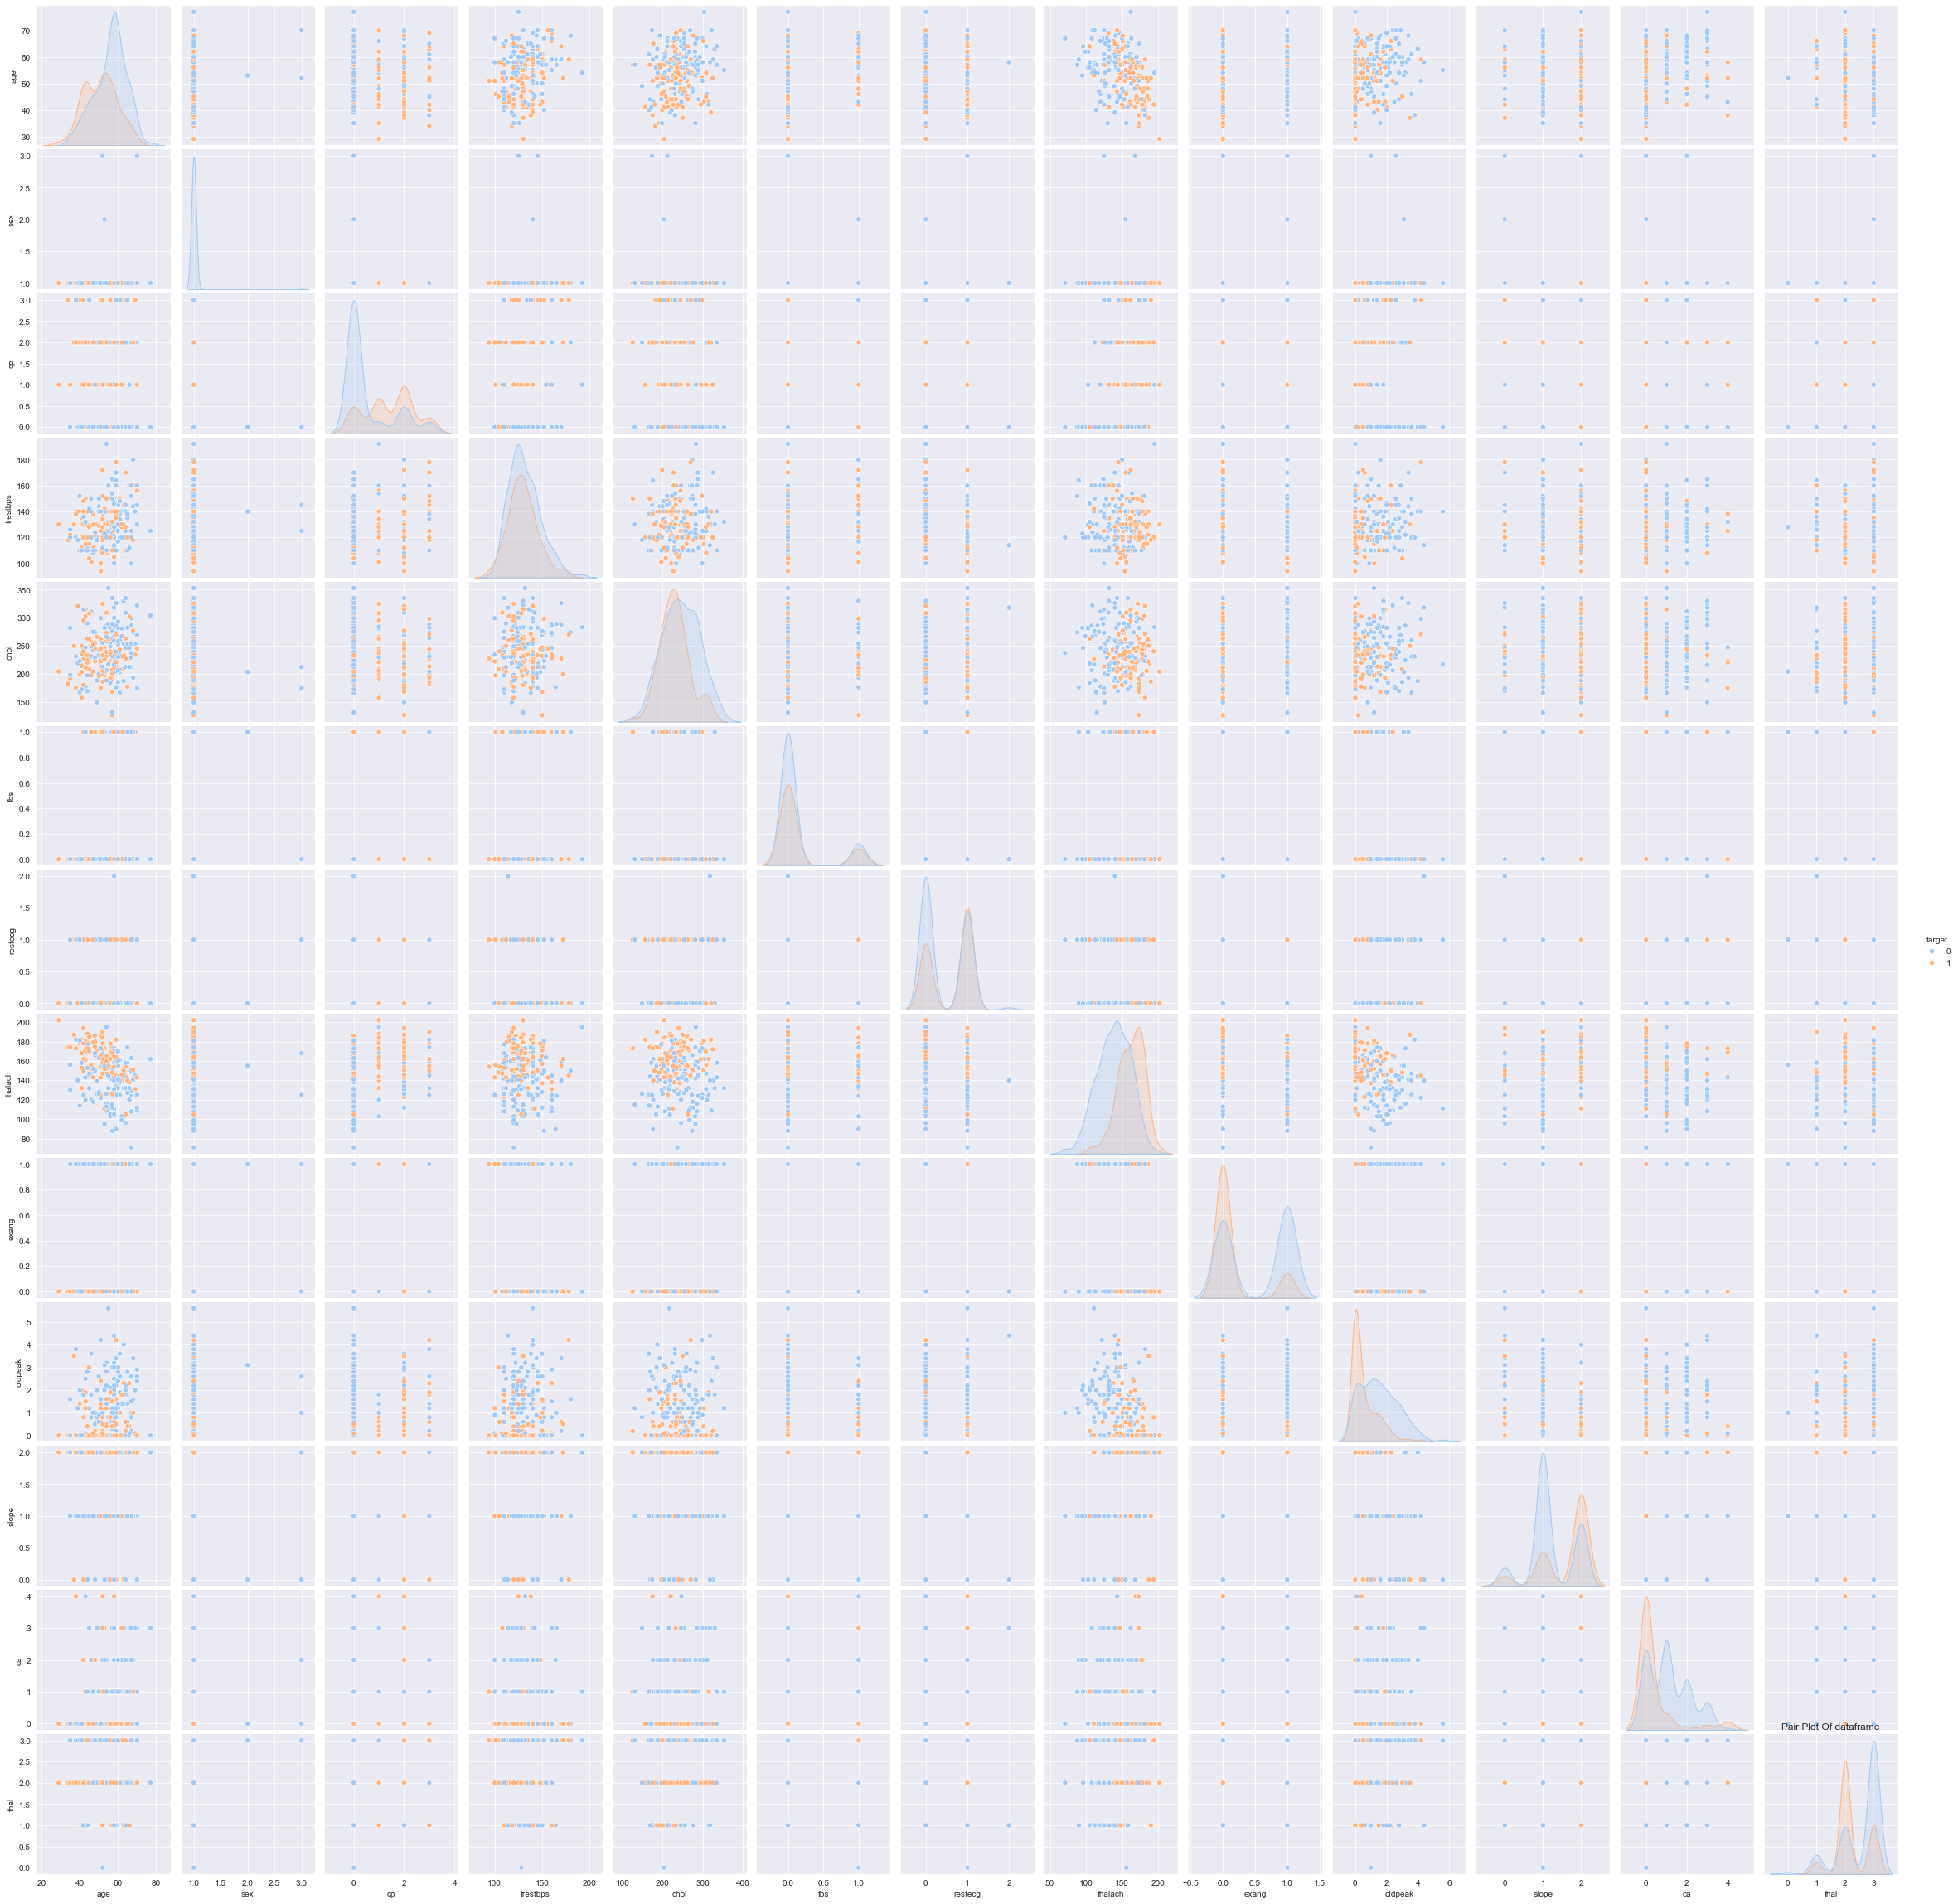

In [8]:
sns.set_palette('pastel')
sns.pairplot(df,hue='target')
plt.title('Pair Plot Of dataframe')
plt.show()

Multivariate analysis using coreelation matrix as heatmap

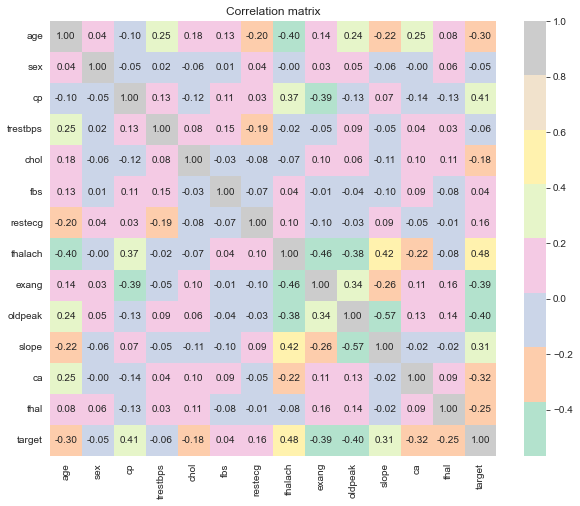

In [9]:
plt.figure(figsize=(10,8))
matrix=df.corr()
sns.heatmap(matrix,annot=True,cmap='Pastel2',fmt='.2f',annot_kws={'size':10})
plt.title('Correlation matrix')
plt.show()

Splitting the data and extracting the target features

Feature Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
scaled=sc.fit_transform(df)
df_scaled=pd.DataFrame(scaled)

In [11]:
x=df_scaled.iloc[:,:-1]
y=df_scaled.iloc[:,-1]

Feature Transformation

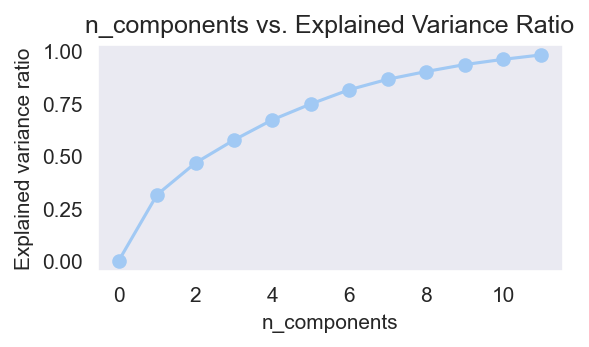

In [12]:
from sklearn.decomposition import PCA
nums = np.arange(12)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(x)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')
plt.show()

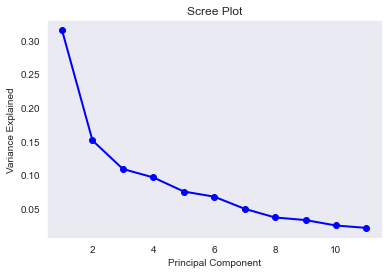

In [13]:
PC_values = np.arange(pca.n_components_) + 1
plt.grid()
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

The optimal number of principal components will be 8 or 9.

In [14]:
pca=PCA(n_components=8)
x_pca=pca.fit_transform(x)
print(sum(pca.explained_variance_ratio_))

0.9019971063131076


Splitting the data into training and testing data

In [15]:
from sklearn.model_selection import train_test_split
x_train_pca,x_test_pca,y_train_pca,y_test_pca=train_test_split(x_pca,y,test_size=0.30,random_state=10)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10,stratify=y) #stratified random sampling is done
print(x_train.head())

           0    1    2         3         4   ...   8         9    10    11        12
450  0.604167  0.0  0.0  0.204082  0.845815  ...  0.0  0.785714  0.0  0.75  0.333333
564  0.666667  0.0  0.0  0.448980  0.176211  ...  1.0  0.642857  0.5  0.25  0.666667
641  0.604167  0.0  0.0  0.530612  0.405286  ...  0.0  0.357143  0.5  0.25  1.000000
136  0.229167  0.0  0.0  0.163265  0.180617  ...  1.0  0.357143  0.5  0.00  1.000000
629  0.687500  0.0  0.0  0.265306  0.621145  ...  1.0  0.321429  0.5  0.50  1.000000

[5 rows x 13 columns]


Model selection and fitting the model

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

Decision Tree Classifier

In [18]:
dt=DecisionTreeClassifier(criterion='gini',random_state=42)
model1=dt.fit(x_train,y_train)
y_pred1_tr=model1.predict(x_train)
acc1_tr=accuracy_score(y_train,y_pred1_tr)*100
print(acc1_tr)
y_pred1=model1.predict(x_test)
acc1=accuracy_score(y_test,y_pred1)*100
print(acc1)

100.0
98.5981308411215


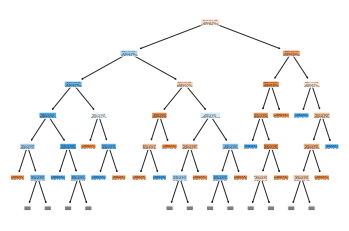

In [19]:
#Visualizing the Decision Tree
from sklearn import tree
tree.plot_tree(dt,rounded=True,max_depth=5,filled=True)
plt.show()

In [20]:
cm1=confusion_matrix(y_test,y_pred1)
print(cm1)

[[124   0]
 [  3  87]]


In [21]:
rep1=classification_report(y_test,y_pred1)
print(rep1)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       124
         1.0       1.00      0.97      0.98        90

    accuracy                           0.99       214
   macro avg       0.99      0.98      0.99       214
weighted avg       0.99      0.99      0.99       214



In [22]:
svm=SVC(kernel='rbf',C=1.0,gamma=0.5)
model2=svm.fit(x_train,y_train)
y_pred2_tr=model2.predict(x_train)
acc2_tr=accuracy_score(y_train,y_pred2_tr)*100
print(acc2_tr)
y_pred2=model2.predict(x_test)
acc2=accuracy_score(y_test,y_pred2)*100
print(acc2)

88.97795591182364
87.85046728971963


In [23]:
cm2=confusion_matrix(y_test,y_pred2)
print(cm2)

[[106  18]
 [  8  82]]


In [24]:
rep3=classification_report(y_test,y_pred2)
print(rep3)

              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       124
         1.0       0.82      0.91      0.86        90

    accuracy                           0.88       214
   macro avg       0.87      0.88      0.88       214
weighted avg       0.88      0.88      0.88       214



In [25]:
rf=RandomForestClassifier(n_estimators=100)
model3=rf.fit(x_train,y_train)
y_pred3_tr=model3.predict(x_train)
acc3_tr=accuracy_score(y_train,y_pred3_tr)*100
print(acc3_tr)
y_pred3=model3.predict(x_test)
acc3=accuracy_score(y_test,y_pred3)*100
print(acc3)

100.0
100.0


In [26]:
cm3=confusion_matrix(y_test,y_pred3)
print(cm3)

[[124   0]
 [  0  90]]


In [27]:
rep3=classification_report(y_test,y_pred3)
print(rep3)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       124
         1.0       1.00      1.00      1.00        90

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



In [28]:
logr=LogisticRegression(penalty='l2',C=1.0)
model4=logr.fit(x_train,y_train)
y_pred4_tr=model4.predict(x_train)
acc4_tr=accuracy_score(y_train,y_pred4_tr)*100
print(acc4_tr)
y_pred4=model4.predict(x_test)
acc4=accuracy_score(y_test,y_pred4)*100
print(acc4)

81.96392785571143
82.2429906542056


In [29]:
cm4=confusion_matrix(y_test,y_pred4)
print(cm4)

[[98 26]
 [12 78]]


In [30]:
rep4=classification_report(y_test,y_pred4)
print(rep4)

              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84       124
         1.0       0.75      0.87      0.80        90

    accuracy                           0.82       214
   macro avg       0.82      0.83      0.82       214
weighted avg       0.83      0.82      0.82       214



In [31]:
adb=AdaBoostClassifier(n_estimators=100,learning_rate=1)
model5=adb.fit(x_train,y_train)
y_pred5_tr=model1.predict(x_train)
acc5_tr=accuracy_score(y_train,y_pred5_tr)*100
print(acc5_tr)
y_pred5=model5.predict(x_test)
acc5=accuracy_score(y_test,y_pred5)*100
print(acc5)

100.0
94.39252336448598


In [32]:
cm5=confusion_matrix(y_test,y_pred5)
print(cm5)

[[119   5]
 [  7  83]]


In [33]:
rep5=classification_report(y_test,y_pred5)
print(rep5)

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       124
         1.0       0.94      0.92      0.93        90

    accuracy                           0.94       214
   macro avg       0.94      0.94      0.94       214
weighted avg       0.94      0.94      0.94       214



In [34]:
hgb=HistGradientBoostingClassifier(learning_rate=0.1)
model6=hgb.fit(x_train,y_train)
y_pred6_tr=model6.predict(x_train)
acc6_tr=accuracy_score(y_train,y_pred6_tr)*100
print(acc6_tr)
y_pred6=model6.predict(x_test)
acc6=accuracy_score(y_test,y_pred6)*100
print(acc6)

100.0
100.0


In [35]:
cm6=confusion_matrix(y_test,y_pred6)
print(cm6)

[[124   0]
 [  0  90]]


In [36]:
rep6=classification_report(y_test,y_pred6)
print(rep6)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       124
         1.0       1.00      1.00      1.00        90

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



In [37]:
dt_pca=DecisionTreeClassifier(criterion='gini',random_state=42)
model1_pca=dt_pca.fit(x_train_pca,y_train_pca)
y_pred1_tr_pca=model1_pca.predict(x_train_pca)
acc1_tr_pca=accuracy_score(y_train,y_pred1_tr_pca)*100
print(acc1_tr_pca)
y_pred1_pca=model1_pca.predict(x_test_pca)
acc1_pca=accuracy_score(y_test_pca,y_pred1_pca)*100
print(acc1_pca)

51.10220440881763
100.0


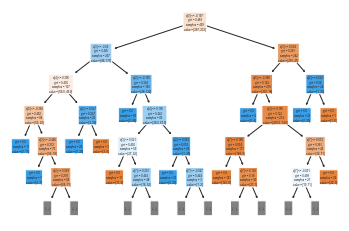

In [38]:
#Visualizing the Decision Tree
from sklearn import tree
tree.plot_tree(dt_pca,rounded=True,max_depth=5,filled=True)
plt.show()

In [39]:
cm1_pca=confusion_matrix(y_test_pca,y_pred1_pca)
print(cm1_pca)

[[126   0]
 [  0  88]]


In [40]:
rep1_pca=classification_report(y_test_pca,y_pred1_pca)
print(rep1_pca)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       126
         1.0       1.00      1.00      1.00        88

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



In [41]:
svm_pca=SVC(kernel='rbf',C=1.0,gamma=0.5)
model2_pca=svm_pca.fit(x_train_pca,y_train_pca)
y_pred2_tr_pca=model2_pca.predict(x_train_pca)
acc2_tr_pca=accuracy_score(y_train_pca,y_pred2_tr_pca)*100
print(acc2_tr_pca)
y_pred2_pca=model2_pca.predict(x_test_pca)
acc2_pca=accuracy_score(y_test_pca,y_pred2_pca)*100
print(acc2_pca)

85.97194388777555
85.51401869158879


In [42]:
cm2_pca=confusion_matrix(y_test_pca,y_pred2_pca)
print(cm2_pca)

[[99 27]
 [ 4 84]]


In [43]:
rep2_pca=classification_report(y_test_pca,y_pred2_pca)
print(rep2_pca)

              precision    recall  f1-score   support

         0.0       0.96      0.79      0.86       126
         1.0       0.76      0.95      0.84        88

    accuracy                           0.86       214
   macro avg       0.86      0.87      0.85       214
weighted avg       0.88      0.86      0.86       214



In [44]:
rf_pca=RandomForestClassifier(n_estimators=100)
model3_pca=rf_pca.fit(x_train_pca,y_train_pca)
y_pred3_tr_pca=model3_pca.predict(x_train_pca)
acc3_tr_pca=accuracy_score(y_train_pca,y_pred3_tr_pca)*100
print(acc3_tr_pca)
y_pred3_pca=model3_pca.predict(x_test_pca)
acc3_pca=accuracy_score(y_test_pca,y_pred3_pca)*100
print(acc3_pca)

100.0
100.0


In [45]:
cm3_pca=confusion_matrix(y_test_pca,y_pred3_pca)
print(cm3_pca)

[[126   0]
 [  0  88]]


In [46]:
rep3_pca=classification_report(y_test_pca,y_pred3_pca)
print(rep3_pca)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       126
         1.0       1.00      1.00      1.00        88

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



In [47]:
logr_pca=LogisticRegression(penalty='l2',C=1.0)
model4_pca=logr_pca.fit(x_train_pca,y_train_pca)
y_pred4_tr_pca=model4_pca.predict(x_train_pca)
acc4_tr_pca=accuracy_score(y_train_pca,y_pred4_tr_pca)*100
print(acc4_tr_pca)
y_pred4_pca=model4_pca.predict(x_test_pca)
acc4_pca=accuracy_score(y_test_pca,y_pred4_pca)*100
print(acc4_pca)

82.56513026052104
84.57943925233646


In [48]:
cm4_pca=confusion_matrix(y_test_pca,y_pred4_pca)
print(cm4_pca)

[[100  26]
 [  7  81]]


In [49]:
rep4_pca=classification_report(y_test_pca,y_pred4_pca)
print(rep4_pca)

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.86       126
         1.0       0.76      0.92      0.83        88

    accuracy                           0.85       214
   macro avg       0.85      0.86      0.84       214
weighted avg       0.86      0.85      0.85       214



In [50]:
adb_pca=AdaBoostClassifier(n_estimators=100,learning_rate=1)
model5_pca=adb_pca.fit(x_train_pca,y_train_pca)
y_pred5_tr_pca=model5_pca.predict(x_train_pca)
acc5_tr_pca=accuracy_score(y_train_pca,y_pred5_tr_pca)*100
print(acc5_tr_pca)
y_pred5_pca=model5_pca.predict(x_test_pca)
acc5_pca=accuracy_score(y_test_pca,y_pred5_pca)*100
print(acc5_pca)

100.0
100.0


In [51]:
cm5_pca=confusion_matrix(y_test_pca,y_pred5_pca)
print(cm5_pca)

[[126   0]
 [  0  88]]


In [52]:
rep5_pca=classification_report(y_test_pca,y_pred5_pca)
print(rep5_pca)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       126
         1.0       1.00      1.00      1.00        88

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



In [53]:
hgb_pca=HistGradientBoostingClassifier(learning_rate=0.1)
model6_pca=hgb_pca.fit(x_train_pca,y_train_pca)
y_pred6_tr_pca=model6_pca.predict(x_train_pca)
acc6_tr_pca=accuracy_score(y_train_pca,y_pred6_tr_pca)*100
print(acc6_tr_pca)
y_pred6_pca=model6_pca.predict(x_test_pca)
acc6_pca=accuracy_score(y_test_pca,y_pred6_pca)*100
print(acc6_pca)

100.0
98.5981308411215


In [54]:
cm6_pca=confusion_matrix(y_test_pca,y_pred6_pca)
print(cm6_pca)

[[123   3]
 [  0  88]]


In [55]:
rep6_pca=classification_report(y_test_pca,y_pred6_pca)
print(rep6_pca)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       126
         1.0       0.97      1.00      0.98        88

    accuracy                           0.99       214
   macro avg       0.98      0.99      0.99       214
weighted avg       0.99      0.99      0.99       214



Feature importance based on mean decrease in impurity in Random Forest

In [56]:
features=list(df.columns)
feature_names = [f"feature {i}" for i in range(x.shape[1])]
import time
start_time=time.time()
importances=rf.feature_importances_
std=np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
elasped_time=time.time()-start_time
print(f'Elasped time to compute the importances : {elasped_time: .3f} seconds')

Elasped time to compute the importances :  0.023 seconds


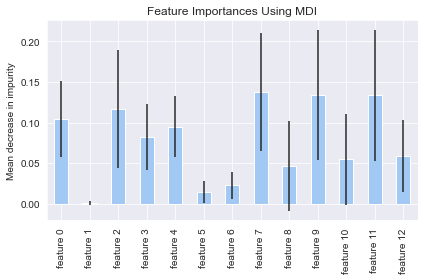

In [57]:
forest_importances=pd.Series(importances,index=feature_names)
fig,ax=plt.subplots()
forest_importances.plot.bar(yerr=std,ax=ax)
ax.set_title("Feature Importances Using MDI")
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()
plt.show()

DICE (Diverse Counterfactual Explanations)

In [58]:
train_df1,test_df1=train_test_split(df,test_size=0.30)
print(train_df1)
train_df=train_df1.drop('target',axis=1)
test_df=test_df1.drop('target',axis=1)
import dice_ml
d=dice_ml.Data(dataframe=train_df1, continuous_features=['age','trestbps','chol','thalach','oldpeak','slope','ca','thal'], outcome_name='target')

     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
189   57    1   0       165   289    1  ...      0      1.0      1   3     3       0
238   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
108   58    1   0       125   300    0  ...      0      0.0      2   2     3       0
263   53    1   2       130   246    1  ...      0      0.0      2   3     2       1
578   70    1   0       145   174    0  ...      1      2.6      0   0     3       0
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
163   41    1   1       120   157    0  ...      0      0.0      2   0     2       1
316   52    1   1       128   205    1  ...      0      0.0      2   0     2       1
21    51    1   3       125   213    0  ...      1      1.4      2   1     2       1
90    53    1   2       130   197    1  ...      0      1.2      0   0     2       1
681   62    1   2       130   231    0  ...      0      1.8      

In [59]:
m=dice_ml.Model(model=dt,backend='sklearn')
exp=dice_ml.Dice(d,m,method='random')

In [67]:
e1=exp.generate_counterfactuals(test_df[0:1],total_CFs=2,desired_class='opposite')
e1.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

Query instance (original outcome : 0.0)


age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   0       130   254    0  ...      0      1.4      1   1     3     0.0

[1 rows x 14 columns]


Diverse Counterfactual set (new outcome: 1.0)


age sex   cp trestbps chol fbs  ... exang oldpeak slope ca thal target
0   -   -  1.0     94.0    -   -  ...     -       -     -  -    -    1.0
1   -   -  2.0        -    -   -  ...     -       -   2.0  -    -    1.0

[2 rows x 14 columns]

In [62]:
m2=dice_ml.Model(model=rf,backend='sklearn')
exp2=dice_ml.Dice(d,m,method='random')

In [82]:
e2=exp2.generate_counterfactuals(test_df[0:1],total_CFs=2,desired_class='opposite')
e2.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

Query instance (original outcome : 0.0)


age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   0       130   254    0  ...      0      1.4      1   1     3     0.0

[1 rows x 14 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  sex   cp trestbps chol fbs  ... exang oldpeak slope ca thal target
0   -    -  1.0        -    -   -  ...     -       -     -  -    -    1.0
1   -  3.0  2.0        -    -   -  ...     -       -     -  -    -    1.0

[2 rows x 14 columns]

In [84]:
e3=exp2.generate_counterfactuals(test_df[0:1],total_CFs=10,desired_class='opposite', permitted_range={'chol':[100,300]})
e3.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Query instance (original outcome : 0.0)


age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   0       130   254    0  ...      0      1.4      1   1     3     0.0

[1 rows x 14 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  sex   cp trestbps   chol  fbs  ... exang oldpeak slope   ca thal target
0   -    -  1.0        -      -    -  ...     -     3.9     -    -    -    1.0
1   -    -  3.0        -      -    -  ...     -       -     -  4.0    -    1.0
2   -    -  1.0        -      -  1.0  ...     -       -     -    -    -    1.0
3   -    -  1.0        -      -    -  ...     -     3.5     -    -    -    1.0
4   -    -  1.0        -      -    -  ...     -     1.0     -    -    -    1.0
5   -    -  3.0        -  149.0    -  ...     -       -     -    -    -    1.0
6   -    -  1.0        -      -    -  ...     -       -     -    -    -    1.0
7   -  2.0  2.0        -      -    -  ...     -       -     -    -    -    1.0
8   -    -  3.0        -  199.0    -  ...     -       -     -    -    -    1.0
9   -    -  1.0        -      -    -  ...     -       -   2.0    -    -    1.0

[10 rows x 14 columns]

In [87]:
query_instances=test_df[0:10]
imp=exp2.local_feature_importance(query_instances,total_CFs=10)
print(imp.summary_importance)

100%|██████████| 10/10 [00:03<00:00,  2.88it/s]

None


In [86]:
query_instances=test_df[0:20]
imp=exp2.global_feature_importance(query_instances,total_CFs=10)
print(imp.summary_importance)

100%|██████████| 20/20 [00:08<00:00,  2.26it/s]


{'cp': 0.495, 'ca': 0.44, 'thal': 0.2, 'thalach': 0.115, 'age': 0.105, 'trestbps': 0.09, 'oldpeak': 0.08, 'restecg': 0.075, 'chol': 0.075, 'sex': 0.055, 'slope': 0.05, 'exang': 0.035, 'fbs': 0.03}


In [88]:
query_instances=test_df[0:20]
imp=exp.global_feature_importance(query_instances,total_CFs=10)
print(imp.summary_importance)

100%|██████████| 20/20 [00:06<00:00,  2.89it/s]


{'cp': 0.52, 'ca': 0.445, 'thal': 0.17, 'chol': 0.12, 'age': 0.105, 'thalach': 0.105, 'oldpeak': 0.09, 'trestbps': 0.075, 'sex': 0.065, 'restecg': 0.045, 'slope': 0.035, 'exang': 0.03, 'fbs': 0.02}


In [89]:
query_instances=test_df[0:10]
imp=exp.local_feature_importance(query_instances,total_CFs=10)
print(imp.summary_importance)

100%|██████████| 10/10 [00:03<00:00,  2.73it/s]

None
